In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
movies = pd.read_csv('datasets/movies.csv')
ratings = pd.read_csv('datasets/ratings.csv')

In [116]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [117]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [118]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [119]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [120]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [121]:
ratings['rating'].unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

In [122]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [123]:
user_num_ratings = ratings.groupby('userId')['rating'].count().reset_index()

In [124]:
user_num_ratings.head()

,userId,rating
0,1,70
1,2,184
2,3,656
3,4,242
4,5,101


In [125]:
user_num_ratings.rename(columns={'rating': 'user_num_ratings'}, inplace=True)

In [126]:
ratings = ratings.merge(user_num_ratings, on='userId')

In [127]:
ratings.head()

,userId,movieId,rating,timestamp,user_num_ratings
0,1,296,5.0,1147880044,70
1,1,306,3.5,1147868817,70
2,1,307,5.0,1147868828,70
3,1,665,5.0,1147878820,70
4,1,899,3.5,1147868510,70


<Axes: >

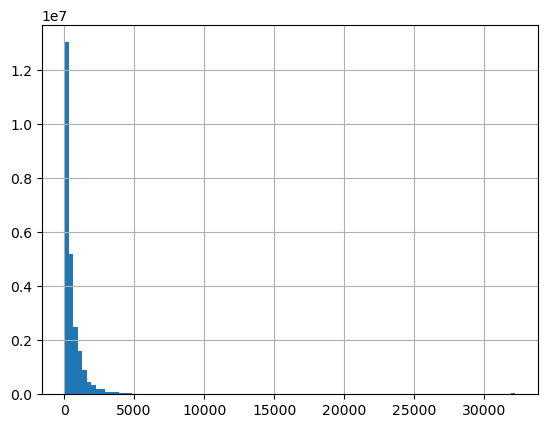

In [128]:
ratings['user_num_ratings'].hist(bins=100)

<Axes: >

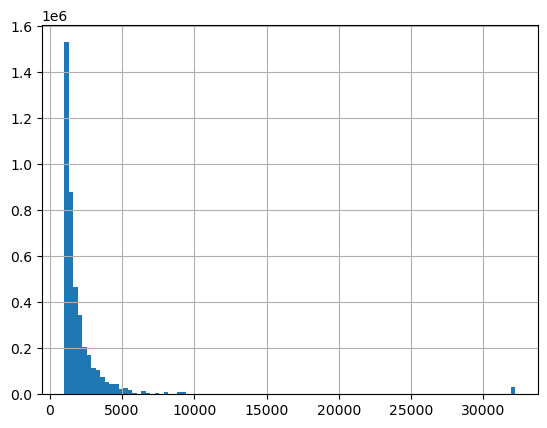

In [129]:
ratings[ratings['user_num_ratings']>1000]['user_num_ratings'].hist(bins=100)

In [130]:
ratings[ratings['user_num_ratings']>500].shape

(8935061, 5)

In [132]:
ratings[ratings['user_num_ratings']>700].shape

(6414297, 5)

In [133]:
ratings = ratings[ratings['user_num_ratings']>700]

In [134]:
ratings.groupby('movieId')['rating'].count().sort_values(ascending=False)

movieId
2571      5116
356       5045
296       4977
1270      4943
593       4911
          ... 
164467       1
164471       1
164473       1
164497       1
209163       1
Name: rating, Length: 56845, dtype: int64

In [135]:
movie_num_ratings = ratings.groupby('movieId')['rating'].count().reset_index()

In [136]:
movie_num_ratings.head()

,movieId,rating
0,1,4669
1,2,3602
2,3,1559
3,4,448
4,5,1553


In [137]:
movie_num_ratings.rename(columns={'rating': 'movie_num_ratings'}, inplace=True)

In [138]:
ratings = ratings.merge(movie_num_ratings, on='movieId')

In [139]:
ratings.head()

,userId,movieId,rating,timestamp,user_num_ratings,movie_num_ratings
0,12,1,4.0,1167582601,736,4669
1,187,1,3.5,1277374478,1387,4669
2,321,1,3.5,1540496405,791,4669
3,426,1,2.5,1452025761,1011,4669
4,541,1,5.0,1542815021,1133,4669


<Axes: >

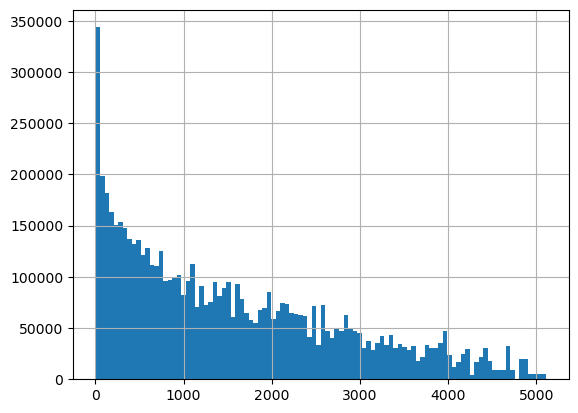

In [140]:
ratings['movie_num_ratings'].hist(bins=100)

<Axes: >

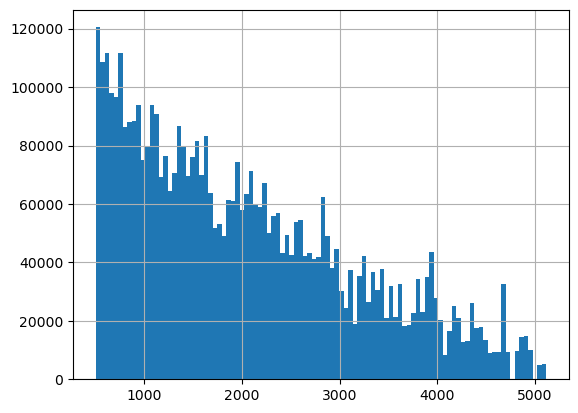

In [141]:
ratings[ratings['movie_num_ratings']>500]['movie_num_ratings'].hist(bins=100)

In [142]:
ratings = ratings[ratings['movie_num_ratings']>500]

In [143]:
ratings.shape

(4701302, 6)

In [144]:
ratings = ratings.merge(movies, on='movieId')

In [145]:
ratings.head()

,userId,movieId,rating,timestamp,user_num_ratings,movie_num_ratings,title,genres
0,12,1,4.0,1167582601,736,4669,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,187,1,3.5,1277374478,1387,4669,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,321,1,3.5,1540496405,791,4669,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,426,1,2.5,1452025761,1011,4669,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,541,1,5.0,1542815021,1133,4669,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [146]:
# I will use this dataset for jenres in app instead of ratings dataset as it is too big
movies = movies[movies['movieId'].isin(ratings['movieId'].unique())]

In [147]:
movies['genres'] = movies['genres'].fillna('')
movies['genres'] = movies['genres'].str.split('|')
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(x))

In [148]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"Adventure, Animation, Children, Comedy, Fantasy"
1,2,Jumanji (1995),"Adventure, Children, Fantasy"
2,3,Grumpier Old Men (1995),"Comedy, Romance"
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),"Action, Crime, Thriller"


In [149]:
movie_pivot = pd.pivot_table(data=ratings, index='userId', columns='title', 
                             values='rating')

In [150]:
movie_pivot.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
12,NaN,3.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
72,3.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,5.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
187,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,4.5,NaN,3.0,NaN,3.5,3.5,3.0,NaN
321,3.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.5,...,NaN,NaN,3.5,3.0,NaN,4.0,NaN,1.0,NaN,NaN
426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,3.5,3.5,0.5,0.5,3.0,NaN,NaN,NaN,NaN


In [151]:
# reset indexes for userId
movie_pivot = movie_pivot.reset_index().drop(columns=['userId'])

In [152]:
# People tend to give higher or lower ratings due to their preferences, in 
# that case we normalize data by extracting mean rating of each user from movie rating.

In [153]:
def normalizer(row):
    average = row.mean()
    return row - average
    
movie_norm = movie_pivot.apply(normalizer, axis=1)
movie_norm.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
0,NaN,-0.347826,NaN,NaN,-0.347826,NaN,-2.347826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152174
1,-0.390411,NaN,NaN,NaN,1.609589,NaN,NaN,-0.390411,NaN,1.609589,...,1.609589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.390411
2,NaN,0.096465,NaN,NaN,-0.903535,NaN,NaN,NaN,NaN,NaN,...,NaN,0.096465,0.596465,NaN,-0.903535,NaN,-0.403535,-0.403535,-0.903535,NaN
3,0.323282,NaN,NaN,0.823282,NaN,NaN,NaN,NaN,NaN,1.323282,...,NaN,NaN,0.323282,-0.176718,NaN,0.823282,NaN,-2.176718,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.031879,...,NaN,0.531879,0.531879,-2.468121,-2.468121,0.031879,NaN,NaN,NaN,NaN


In [154]:
# we are filling nan values with zeros as it needs for cosine similarity

In [155]:
from sklearn.metrics.pairwise import cosine_similarity

In [156]:
user_sim = pd.DataFrame(cosine_similarity(movie_norm.fillna(0)))

In [157]:
user_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,5353,5354,5355,5356,5357,5358,5359,5360,5361,5362
0,1.000000,0.218475,0.039337,0.124854,0.088867,0.035980,0.081311,0.149865,-0.004731,0.071415,...,-0.017122,-0.016305,0.077972,0.179817,0.050264,0.123265,0.161181,0.054443,-0.011146,0.145634
1,0.218475,1.000000,0.052685,0.142669,0.100706,0.026507,0.097985,0.137938,0.009310,0.138856,...,0.004790,0.012874,0.112290,0.096976,0.084615,0.093078,0.096034,0.071993,0.028361,0.135861
2,0.039337,0.052685,1.000000,0.122781,0.037309,-0.025520,0.117712,0.204117,0.041319,0.032301,...,0.052893,0.082013,0.096429,0.102005,0.071819,0.024238,0.093763,0.148820,0.042593,0.159660
3,0.124854,0.142669,0.122781,1.000000,0.152730,0.065459,0.176843,0.264462,0.004582,0.096495,...,0.059415,-0.008527,0.105909,0.163910,0.112977,0.045655,0.123987,0.025411,0.004122,0.200472
4,0.088867,0.100706,0.037309,0.152730,1.000000,0.079820,0.104793,0.097389,0.078964,0.090289,...,0.086430,-0.013074,0.000361,0.067524,0.058224,0.073864,0.056195,0.003042,-0.039473,0.061980


In [158]:
import pickle as pkl

In [159]:
pkl.dump(user_sim, open('files/user_similarity.pkl', 'wb'))
movies.to_csv('files/movies.csv', index=False)
movie_norm.to_csv('files/movie_pivot_normalized.csv', index=False)

In [160]:
len(user_sim.columns)

5363

In [201]:
picked_userid = 1942

# Remove picked user ID from the candidate list
user_sim.drop(index=picked_userid, inplace=True)

user_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,5353,5354,5355,5356,5357,5358,5359,5360,5361,5362
1,0.218475,1.000000,0.052685,0.142669,0.100706,0.026507,0.097985,0.137938,0.009310,0.138856,...,0.004790,0.012874,0.112290,0.096976,0.084615,0.093078,0.096034,0.071993,0.028361,0.135861
2,0.039337,0.052685,1.000000,0.122781,0.037309,-0.025520,0.117712,0.204117,0.041319,0.032301,...,0.052893,0.082013,0.096429,0.102005,0.071819,0.024238,0.093763,0.148820,0.042593,0.159660
3,0.124854,0.142669,0.122781,1.000000,0.152730,0.065459,0.176843,0.264462,0.004582,0.096495,...,0.059415,-0.008527,0.105909,0.163910,0.112977,0.045655,0.123987,0.025411,0.004122,0.200472
4,0.088867,0.100706,0.037309,0.152730,1.000000,0.079820,0.104793,0.097389,0.078964,0.090289,...,0.086430,-0.013074,0.000361,0.067524,0.058224,0.073864,0.056195,0.003042,-0.039473,0.061980
5,0.035980,0.026507,-0.025520,0.065459,0.079820,1.000000,0.070498,0.044084,0.013530,-0.013381,...,-0.046438,-0.009941,-0.005213,0.125468,0.040655,0.098043,0.059329,-0.051384,-0.105333,0.004789


In [202]:
# The user-based collaborative filtering makes recommendations based on users with similar tastes, 
# so we need to set a positive threshold. Here we set the user_similarity_threshold to be 0.2,
# meaning that user must have a cosine similarity coefficient of at least 0.2 to be considered 
# as a similar user.

In [214]:
# User similarty threshold
user_sim_thresh = 0.1

# Get top n similar users
similar_users = user_sim[user_sim[picked_userid]>user_sim_thresh][picked_userid]\
    .sort_values(ascending=False)[:10]

print('Similar users:')
print(similar_users)

Similar users:
2320    0.174416
4679    0.143419
4813    0.138065
2125    0.134622
5340    0.134074
3755    0.133493
4111    0.131985
3592    0.131720
3835    0.126589
5062    0.125191
Name: 1942, dtype: float64


In [215]:
movie_norm[movie_norm.index==0]

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
0,NaN,-0.347826,NaN,NaN,-0.347826,NaN,-2.347826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152174


In [216]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = movie_norm[movie_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')

In [217]:
similar_user_movies

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),12 Years a Slave (2013),...,Zero Dark Thirty (2012),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
2125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.149938,NaN,0.850062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2320,NaN,-0.851966,0.148034,-1.851966,0.148034,NaN,NaN,NaN,NaN,NaN,...,1.648034,1.148034,0.648034,NaN,NaN,NaN,-0.351966,0.148034,NaN,-1.351966
3592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.875543,-0.875543,NaN,NaN
3755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.442308,...,NaN,NaN,NaN,NaN,NaN,0.557692,NaN,NaN,NaN,NaN
3835,NaN,NaN,-0.735226,NaN,NaN,NaN,NaN,NaN,NaN,-0.735226,...,0.264774,0.264774,-0.235226,NaN,NaN,0.264774,NaN,-0.235226,NaN,NaN
4111,0.111042,1.611042,1.111042,0.111042,-0.388958,-0.888958,0.111042,-1.388958,-1.388958,2.111042,...,1.111042,1.611042,1.611042,1.111042,-1.388958,2.111042,-0.888958,-0.388958,NaN,-0.388958
4679,NaN,0.007471,NaN,-0.992529,-0.492529,NaN,NaN,NaN,NaN,NaN,...,NaN,1.007471,0.507471,1.007471,NaN,NaN,NaN,0.007471,-0.492529,0.507471
4813,NaN,-1.190755,NaN,NaN,-0.690755,NaN,NaN,NaN,NaN,NaN,...,-0.190755,NaN,NaN,-0.690755,NaN,NaN,NaN,-0.190755,NaN,NaN
5062,NaN,-0.997423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.002577,0.002577,NaN,NaN,NaN,NaN,-1.497423,NaN,0.502577
5340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013001,...,0.013001,0.013001,0.013001,0.013001,NaN,NaN,-0.986999,NaN,NaN,NaN


In [218]:
# Movies that the target user has watched
# how='all' parameter means it’s only dropping columns where all values are NaN.
picked_userid_watched = movie_norm[movie_norm.index==0].dropna(axis=1, how='all')

In [219]:
picked_userid_watched

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),28 Days Later (2002),About a Boy (2002),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Addams Family Values (1993),"Addams Family, The (1991)",Addicted to Love (1997),...,With Honors (1994),Witness for the Prosecution (1957),"Wizard of Oz, The (1939)",Wonder Boys (2000),Working Girl (1988),"World Is Not Enough, The (1999)",X-Men (2000),You've Got Mail (1998),Young Guns (1988),¡Three Amigos! (1986)
0,-0.347826,-0.347826,-2.347826,0.652174,1.152174,0.652174,-0.847826,-1.347826,-0.347826,-0.847826,...,-0.347826,0.652174,0.652174,0.652174,0.652174,-0.347826,-1.347826,-1.347826,0.652174,0.152174


In [220]:
# Remove movies that target user watched
similar_user_movies.drop(columns=picked_userid_watched.columns, errors='ignore', inplace=True)

In [221]:
similar_user_movies

title,"'burbs, The (1989)",10 Cloverfield Lane (2016),"10,000 BC (2008)",101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",...,Zathura (2005),Zero Dark Thirty (2012),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005)
2125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.149938,NaN,1.350062,...,NaN,-0.149938,NaN,0.850062,NaN,NaN,NaN,NaN,NaN,NaN
2320,NaN,0.148034,0.148034,NaN,NaN,NaN,NaN,0.148034,NaN,0.648034,...,NaN,1.648034,1.148034,0.648034,NaN,NaN,NaN,-0.351966,0.148034,NaN
3592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.875543,-0.875543,NaN
3755,NaN,NaN,NaN,NaN,NaN,NaN,-0.442308,NaN,NaN,0.557692,...,NaN,NaN,NaN,NaN,NaN,NaN,0.557692,NaN,NaN,NaN
3835,NaN,-0.735226,NaN,NaN,NaN,NaN,-0.735226,-0.235226,NaN,NaN,...,NaN,0.264774,0.264774,-0.235226,NaN,NaN,0.264774,NaN,-0.235226,NaN
4111,0.111042,1.111042,-0.388958,0.111042,-1.388958,-1.388958,2.111042,0.111042,1.111042,-0.888958,...,-0.888958,1.111042,1.611042,1.611042,1.111042,-1.388958,2.111042,-0.888958,-0.388958,NaN
4679,NaN,NaN,-0.492529,NaN,NaN,NaN,NaN,NaN,NaN,-1.492529,...,NaN,NaN,1.007471,0.507471,1.007471,NaN,NaN,NaN,0.007471,-0.492529
4813,NaN,NaN,-0.690755,NaN,NaN,NaN,NaN,-0.690755,NaN,NaN,...,NaN,-0.190755,NaN,NaN,-0.690755,NaN,NaN,NaN,-0.190755,NaN
5062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.497423,...,NaN,NaN,0.002577,0.002577,NaN,NaN,NaN,NaN,-1.497423,NaN
5340,NaN,NaN,NaN,NaN,NaN,NaN,0.013001,-0.486999,NaN,-1.986999,...,NaN,0.013001,0.013001,0.013001,0.013001,NaN,NaN,-0.986999,NaN,NaN


In [222]:
# # A dictionary to store item scores
# item_score = {}

# # Loop through items
# for i in similar_user_movies.columns:
#     # Get the ratings for movie i
#     movie_rating = similar_user_movies[i]
#     # Create a variable to stor the score
#     total = 0
#     # variable to store the number of scores
#     count = 0
#     for u in similar_users.index:
#         # If the movie has rating
#         if pd.isna(movie_rating[u]) == False:
#             # Score is the sum of user similarity score multiply by the movie rating
#             score = similar_users[u] * movie_rating[u]
#             # Add the score to the total score for the movie so far
#             total += score
#             # Add 1 to the count
#             count += 1
#     # Get the average score for the item 
#     item_score[i] = total/count

# # Convert dictionary to pandas dataframe
# item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# # Sort the movies by score
# ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# # Select top m movies
# m = 10
# ranked_item_score.head(m)

In [223]:
# Get top 10 movies to recommend for target user
movies_scores = similar_user_movies.mean(axis=0).sort_values(ascending=False)[:10]
movies_to_recommend = movies_scores.index.to_list()

In [224]:
movies[movies['title'].isin(movies_to_recommend)]['title'].to_list()

['Basketball Diaries, The (1995)',
 'Bronx Tale, A (1993)',
 'My Own Private Idaho (1991)',
 'Fatal Attraction (1987)',
 'Funny Games (1997)',
 'Notebook, The (2004)',
 'Step Brothers (2008)',
 'Timecrimes (Cronocrímenes, Los) (2007)',
 'Impossible, The (Imposible, Lo) (2012)',
 'Planet Earth (2006)']